In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
import os
base_dir = "/media/gegen07/Expansion/data/mestrado/checkins_data/checkins_local"
file = os.path.join(base_dir, "checkins_local_Alabama.csv")
data = pd.read_csv(file)

In [2]:
data.placeid.nunique()

NameError: name 'data' is not defined

In [2]:
features = pd.read_csv("../data/illinois_cat_placeid_embeddings.csv")

In [3]:
features

,place_id,category,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9
0,100000,Food,-1.127541,0.835962,-0.657292,1.678449,-2.049169,-0.228190,0.726265,-0.185079,0.765924,0.307674
1,100001,Entertainment,-0.087449,-1.023194,-0.896140,2.114807,-0.884925,-0.511134,-0.592944,0.145536,1.629420,0.261607
2,100002,Shopping,-2.022270,-1.222282,1.296573,0.098303,-0.935828,0.117154,0.584736,0.033404,0.944788,1.094353
3,100003,Shopping,1.614369,0.763034,-1.076192,1.376295,-1.292530,0.028080,-1.378353,-0.108497,0.813730,-0.420959
4,100004,Shopping,-0.693763,0.429295,1.143473,0.338911,-2.433566,0.510315,-0.453661,-0.576030,0.881150,0.995392
...,...,...,...,...,...,...,...,...,...,...,...,...
33451,133006,Community,-1.178334,1.244576,-0.037808,1.177509,-2.379700,0.144389,0.527240,-0.212965,0.726616,0.080313
33452,133007,Community,-1.178164,0.071792,0.530609,1.302866,-2.044346,-0.381489,0.121619,-0.359327,1.629538,0.433716
33453,133008,Community,-1.275020,0.737871,0.140776,1.326112,-2.317099,0.002910,0.403559,-0.377665,0.938624,0.506650
33454,133009,Travel,-1.682521,0.161764,1.207770,0.194845,-2.079125,0.076949,0.593532,-0.219870,1.078450,0.717481


In [4]:
features["category"].unique()

array(['Food', 'Entertainment', 'Shopping', 'Outdoors', 'Community',
       'Travel', 'Nightlife'], dtype=object)

In [ ]:
# Array de categorias
categorias = pd.Series(['Food', 'Entertainment', 'Shopping', 'Outdoors', 'Community', 'Travel', 'Nightlife'])

# Criar um mapeamento de categorias para inteiros
mapeamento = {categoria: idx for idx, categoria in enumerate(categorias)}

# Adicionar uma coluna com os valores mapeados
features["category"] = features["category"].apply(lambda x: mapeamento[x])

features

KeyError: 0

: 

In [5]:
soma_colunas = features.sum()
colunas_soma_zero = soma_colunas[soma_colunas.eq(0)]

numero_colunas_soma_zero = len(colunas_soma_zero)

print(numero_colunas_soma_zero)

0


In [6]:
features[features < 0] = 0

TypeError: '<' not supported between instances of 'str' and 'int'

In [4]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,0:99], features.iloc[:,100])

IndexError: single positional indexer is out-of-bounds

In [9]:
# Supondo que 'features' tenha uma coluna categórica chamada 'Categoria'
features = pd.get_dummies(features, drop_first=True)

# Se seu rótulo estiver nas últimas colunas, você pode separá-los novamente
X = features.iloc[:, :-1]  # Todas as colunas menos a última
Y = features.iloc[:, -1]    # A última coluna como alvo

In [10]:
print(features.isnull().sum())

place_id              0
embed_0               0
embed_1               0
embed_2               0
embed_3               0
                     ..
category_Food         0
category_Nightlife    0
category_Outdoors     0
category_Shopping     0
category_Travel       0
Length: 107, dtype: int64


In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)
from sklearn.preprocessing import LabelEncoder

# Supondo que 'features' é seu DataFrame contendo a coluna 'category'
# Exemplo de carregamento dos dados
# features = pd.read_csv('seu_arquivo.csv')

# Codificar a coluna 'category' para valores inteiros
le = LabelEncoder()
features['category'] = le.fit_transform(features['category'])

# Dividir variáveis em X e Y
X = features.drop(columns=['category'])  # Todas as colunas menos 'category'
Y = features['category']                  # A coluna 'category' como alvo

# Certifique-se de que Y tenha apenas valores dentro do range esperado (0 a 6)
assert (Y.min() >= 0) and (Y.max() <= 6), "A coluna 'category' deve conter valores entre 0 e 6."

# Criação do KFold
kf = KFold(n_splits=5, shuffle=True)

# Listas para acumular métricas
results = {
    "accuracy": [],
    "weighted_precision": [],
    "weighted_recall": [],
    "weighted_f1": [],
    "macro_precision": [],
    "macro_recall": [],
    "macro_f1": [],
}

0        2
1        1
2        5
3        5
4        5
        ..
33451    0
33452    0
33453    0
33454    6
33455    4
Name: category, Length: 33456, dtype: int64

In [ ]:
for train_index, test_index in kf.split(X, Y):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]

    model = svm.SVC(kernel="linear", decision_function_shape='ovo', class_weight='balanced')
    model.fit(X_train, Y_train)

    y_predicted = model.predict(X_test)

    # Cálculo das métricas
    results["accuracy"].append(accuracy_score(Y_test, y_predicted))
    results["weighted_precision"].append(precision_score(Y_test, y_predicted, average='weighted'))
    results["weighted_recall"].append(recall_score(Y_test, y_predicted, average='weighted'))
    results["weighted_f1"].append(f1_score(Y_test, y_predicted, average='weighted'))
    results["macro_precision"].append(precision_score(Y_test, y_predicted, average='macro'))
    results["macro_recall"].append(recall_score(Y_test, y_predicted, average='macro'))
    results["macro_f1"].append(f1_score(Y_test, y_predicted, average='macro'))

# Resultado médio das métricas
print("Resultados Médios da Validação Cruzada:")
print(f"Accuracy: {sum(results['accuracy']) / len(results['accuracy'])}")	

In [4]:
le = LabelEncoder()
features['category'] = le.fit_transform(features['category'])

# Dividir variáveis em X e Y
X = features.drop(columns=['place_id', 'category'])  # Todas as colunas menos 'place_id' e 'category'
Y = features['category']                              # A coluna 'category' como alvo

# Criação do KFold
kf = KFold(n_splits=5, shuffle=True)

# Listas para acumular métricas
results = {
    "accuracy": [],
    "weighted_precision": [],
    "weighted_recall": [],
    "weighted_f1": [],
    "macro_precision": [],
    "macro_recall": [],
    "macro_f1": [],
}

In [5]:
for train_index, test_index in kf.split(X, Y):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]

    model = svm.SVC(kernel="linear", decision_function_shape='ovo', class_weight='balanced')
    model.fit(X_train, Y_train)

    y_predicted = model.predict(X_test)

    # Cálculo das métricas
    results["accuracy"].append(accuracy_score(Y_test, y_predicted))
    results["weighted_precision"].append(precision_score(Y_test, y_predicted, average='weighted', zero_division=0))
    results["weighted_recall"].append(recall_score(Y_test, y_predicted, average='weighted', zero_division=0))
    results["weighted_f1"].append(f1_score(Y_test, y_predicted, average='weighted', zero_division=0))
    results["macro_precision"].append(precision_score(Y_test, y_predicted, average='macro', zero_division=0))
    results["macro_recall"].append(recall_score(Y_test, y_predicted, average='macro', zero_division=0))
    results["macro_f1"].append(f1_score(Y_test, y_predicted, average='macro', zero_division=0))

In [6]:
# Resultado médio das métricas
print("Resultados Médios da Validação Cruzada:")
print(f"Accuracy: {sum(results['accuracy']) / len(results['accuracy'])}")
print(f"Weighted Precision: {sum(results['weighted_precision']) / len(results['weighted_precision'])}")
print(f"Weighted Recall: {sum(results['weighted_recall']) / len(results['weighted_recall'])}")
print(f"Weighted F1 Score: {sum(results['weighted_f1']) / len(results['weighted_f1'])}")
print(f"Macro Precision: {sum(results['macro_precision']) / len(results['macro_precision'])}")
print(f"Macro Recall: {sum(results['macro_recall']) / len(results['macro_recall'])}")
print(f"Macro F1 Score: {sum(results['macro_f1']) / len(results['macro_f1'])}")

Resultados Médios da Validação Cruzada:
Accuracy: 0.46703133979385286
Weighted Precision: 0.5635301436981918
Weighted Recall: 0.46703133979385286
Weighted F1 Score: 0.4763132364032005
Macro Precision: 0.4256082051184064
Macro Recall: 0.5544058036726573
Macro F1 Score: 0.4419303913245553


In [8]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:, 0:99], features.iloc[:, 100])
fscores, precisions, recalls = [], [], []

acc = []
precision = []
recall = []
w_avg_f = []
m_avg_f = []

w_avg_p = []
m_avg_p = []

w_avg_r = []
m_avg_r = []

for train_index, test_index in split:
  
    X_train, Y_train = features.loc[train_index].iloc[:,
                                                        :99], features.loc[train_index].iloc[:, 100]
    x_test, y_test = features.loc[test_index].iloc[:,
                                                    :99], features.loc[test_index].iloc[:, 100]

    model = svm.SVC(
        kernel="linear", decision_function_shape='ovo',  class_weight="balanced")
    model.fit(X_train, Y_train)

    y_predicted = model.predict(x_test)
    
    precision, recall, fscore, support = score(y_test, y_predicted)
    acc.append(accuracy_score(y_test, y_predicted))

    fscores.append(fscore)
    precisions.append(precision)
    recalls.append(recall)

    w_avg_f.append(f1_score(y_test, y_predicted, average='weighted'))
    m_avg_f.append(f1_score(y_test, y_predicted, average='macro'))

    w_avg_p.append(precision_score(
        y_test, y_predicted, average='weighted'))
    m_avg_p.append(precision_score(y_test, y_predicted, average='macro'))

    w_avg_r.append(recall_score(y_test, y_predicted, average='weighted'))
    m_avg_r.append(recall_score(y_test, y_predicted, average='macro'))
    class_labels = sorted(set(y_test))


ValueError: could not convert string to float: 'Food'

In [29]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Verifique a estrutura do DataFrame
print("Estrutura do DataFrame 'features':")
print(features.info())

# Verifique se há valores faltantes
print("Verificação de valores faltantes:")
print(features.isnull().sum())

# Verifique os tipos de dados antes de prosseguir
print("Tipos de dados no DataFrame:")
print(features.dtypes)

# Criação do objeto KFold
kf = KFold(n_splits=5, shuffle=True)

# Codificação da variável alvo
label_encoder = LabelEncoder()
features.iloc[:, 100] = label_encoder.fit_transform(features.iloc[:, 100])

# Verificações após codificação
print("Valores únicos em Y após codificação:", features.iloc[:, 100].unique())
print("Tipo de dado em Y:", features.iloc[:, 100].dtype)

acc = []
fscores = []
precisions = []
recalls = []

for train_index, test_index in kf.split(features.iloc[:, 0:99], features.iloc[:, 100]):
  
    X_train = features.iloc[train_index, :99]
    Y_train = features.iloc[train_index, 100]
    x_test = features.iloc[test_index, :99]
    y_test = features.iloc[test_index, 100]

    # Verificar o conteúdo de Y_train antes do treinamento
    print(f"Y_train antes do treino (primeiros 5): {Y_train.head()}") 
    print(f"Tipo de dado de Y_train: {Y_train.dtype}")

    # Verificando se Y_train contém strings
    if not pd.api.types.is_numeric_dtype(Y_train):
        print("Y_train ainda contém valores não numéricos. Verifique os dados de entrada.")
        break

    # Treinamento do modelo
    model = svm.SVC(kernel="linear", decision_function_shape='ovo', class_weight="balanced")
    
    try:
        model.fit(X_train, Y_train)
        y_predicted = model.predict(x_test)
    except ValueError as e:
        print(f"Erro ao treinar o modelo: {e}")
        break

    acc.append(accuracy_score(y_test, y_predicted))
    fscores.append(f1_score(y_test, y_predicted, average='macro'))
    precisions.append(precision_score(y_test, y_predicted, average='macro'))
    recalls.append(recall_score(y_test, y_predicted, average='macro'))

# Resultados Finais
print(f'Accuracy: {acc}')
print(f'FScores: {fscores}')
print(f'Precisions: {precisions}')
print(f'Recalls: {recalls}')

Estrutura do DataFrame 'features':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33456 entries, 0 to 33455
Columns: 102 entries, place_id to embed_99
dtypes: float64(100), int64(1), object(1)
memory usage: 26.0+ MB
None
Verificação de valores faltantes:
place_id    0
category    0
embed_0     0
embed_1     0
embed_2     0
           ..
embed_95    0
embed_96    0
embed_97    0
embed_98    0
embed_99    0
Length: 102, dtype: int64
Tipos de dados no DataFrame:
place_id      int64
category     object
embed_0     float64
embed_1     float64
embed_2     float64
             ...   
embed_95    float64
embed_96    float64
embed_97    float64
embed_98    float64
embed_99    float64
Length: 102, dtype: object
Valores únicos em Y após codificação: [10556. 12906.  3340. ... 18722. 27856. 14655.]
Tipo de dado em Y: float64
Y_train antes do treino (primeiros 5): 1    12906.0
2     3340.0
3    16250.0
5      137.0
6     5615.0
Name: embed_98, dtype: float64
Tipo de dado de Y_train: float64
Erro 

In [30]:
name_columns = [x for x in class_labels]
metrics_f = pd.DataFrame(fscores, columns = name_columns)
metrics_p = pd.DataFrame(precisions, columns = name_columns)
metrics_r = pd.DataFrame(recalls, columns = name_columns)

metrics_f["accuracy"] = acc
metrics_f["macro avg"] = m_avg_f
metrics_f["weighted avg"] = w_avg_f

metrics_p["weighted avg"] = w_avg_p
metrics_p["macro avg"] = m_avg_p

metrics_r["weighted avg"] = w_avg_r
metrics_r["macro avg"] = m_avg_r

print("Métricas precision:")
display(metrics_p)

print("Métricas recall:")
display(metrics_r)

print("Métricas fscore:")
display(metrics_f)

NameError: name 'class_labels' is not defined

In [39]:
metrics_f.columns

Index([0, 1, 2, 3, 4, 5, 6, 'accuracy', 'macro avg', 'weighted avg'], dtype='object')

<AxesSubplot: xlabel='variable', ylabel='value'>

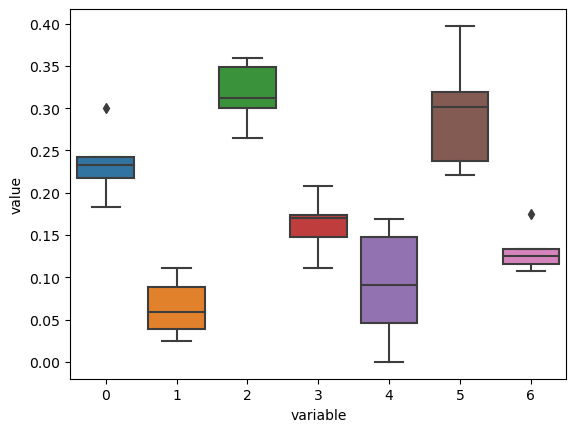

In [42]:
sns.boxplot(x="variable", y="value", data=metrics_f[[0, 1, 2, 3, 4, 5, 6]].melt())